# Projet 2  - Analysez des données de systèmes éducatifs

### Import all the necessary librairies - Importation de toutes les librairies nécessaires

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import collections
import inspect

import missingno
%matplotlib inline

### Import all the necessary data - Importation de toutes les bases de données nécessaires 

In [74]:
country = pd.read_csv('data/EdStatsCountry.csv')
countryseries = pd.read_csv('data/EdStatsCountry-Series.csv')
data = pd.read_csv('data/EdStatsData.csv', )
footnote = pd.read_csv('data/EdStatsFootNote.csv')
series = pd.read_csv('data/EdStatsSeries.csv')
data2 = data.copy() #In case we need it !!!!
## data_decades = data.copy()

### Databases' exploration - Exploration des bases de données

#### Column's names

In [75]:
# Show all databases columns - Montre toutes les colonnes des bases de données
print(country.columns);
print(countryseries.columns);
print(series.columns);
print(footnote.columns);
print(data.columns)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')
Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')
Index(['Series Code', 'Topic

#### Inside look in those DataBases (DBs)

In [76]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [77]:
countryseries.tail()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
612,ZWE,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [78]:
series.tail() 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [80]:
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Common variables between DBs

In [81]:
... print(np.intersect1d(data.columns, country.columns))
... print(np.intersect1d(data.columns, series.columns))
... print(np.intersect1d(data.columns, footnote.columns))
... print(np.intersect1d(data.columns, countryseries.columns))
... print(np.intersect1d(country.columns, countryseries.columns))
# One common variable between data and country : Country Code - Une variable en commun entre data et country : Country Code
# One common variable between data and series : Indicator Name - Une variable en commun entre data et series : Indicator Name
# No common name for the three other comparaison - Aucun nom en commun

['Country Code']
['Indicator Name']
[]
[]
[]


#### Shape of each dataset

In [82]:
print(country.shape);
print(series.shape);
print(countryseries.shape);
print(footnote.shape);
print(data.shape);

(241, 32)
(3665, 21)
(613, 4)
(643638, 5)
(886930, 70)


#### Missing data

In [83]:
# Find the percentage of missing values per columns
# Creation of a function that gives the percentage missing
def missing(x):
    print (round((x.isnull().sum() * 100/ len(x)),2).sort_values(ascending=True))


missing(data)


Country Name        0.00
Country Code        0.00
Indicator Name      0.00
Indicator Code      0.00
2010               72.67
                   ...  
1973               95.99
1971               95.99
2016               98.14
2017               99.98
Unnamed: 69       100.00
Length: 70, dtype: float64


In [84]:
# Find the percentage of missing values per rows
#r = n_data.apply(lambda x: x.count(), axis=1)
n_data.isnull().sum(axis=0)

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
2000              608798
2001              662099
2002              661458
2003              655215
2004              656780
2005              601552
2006              645368
2007              648532
2008              651268
2009              643623
2010              543545
2011              639730
2012              639132
2013              648722
dtype: int64

In [98]:
#missingno.bar(data, figsize=(10,5), fontsize=12);

In [99]:
#missingno.heatmap(data, figsize=(10,5), fontsize=12);

#### Replicated data

In [100]:
print(country.duplicated(keep=False).sum());
print(countryseries.duplicated(keep=False).sum());
print(series.duplicated(keep=False).sum());
print(footnote.duplicated(keep=False).sum());
print(data.duplicated(keep=False).sum());

0
0
0
0
0


No replicated data in `data`

#### Suppression des colonnes non nécéssaires dans les bases de données

In [101]:
country = pd.read_csv('data/EdStatsCountry.csv')
countryseries = pd.read_csv('data/EdStatsCountry-Series.csv')
data = pd.read_csv('data/EdStatsData.csv', )
footnote = pd.read_csv('data/EdStatsFootNote.csv')
series = pd.read_csv('data/EdStatsSeries.csv')

In [102]:
del data['Unnamed: 69']
del footnote['Unnamed: 4']
del country['Unnamed: 31']
del countryseries['Unnamed: 3']
del series['Unnamed: 20']

print(country.columns);
print(countryseries.columns);
print(series.columns);
print(footnote.columns);
print(data.columns)

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')
Index(['CountryCode', 'SeriesCode', 'DESCRIPTION'], dtype='object')
Index(['Series Code', 'Topic', 'Indicator Name', 'Short d

#### Création de listes - zones, pays, niveau de vie

In [103]:
region_list = set(country['Region'].dropna().tolist());
gdp_list = set(country['Income Group'].dropna().tolist());
list_country = set(country['Short Name'].dropna().tolist());

In [104]:
region_list

{'East Asia & Pacific',
 'Europe & Central Asia',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa'}

In [105]:
gdp_list

{'High income: OECD',
 'High income: nonOECD',
 'Low income',
 'Lower middle income',
 'Upper middle income'}

In [106]:
list_country

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 "Dem. People's Rep. Korea",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Eur

#### Create a clean list with only the countries

In [107]:
list_tot = [*region_list, *gdp_list];
country_list = [x for x in list_country if x not in list_tot];

In [108]:
list_rest = ['Middle East & North Africa (all income levels)',
             'East Asia & Pacific (developing only)', 
             'Latin America & Caribbean (all income levels)', 
             'Heavily indebted poor countries (HIPC)',
             'Sub-Saharan Africa (developing only)',
            'Least developed countries: UN classification',
            'Low & middle income',
             'East Asia & Pacific (all income levels)',
            'Europe & Central Asia (all income levels)',
             'Europe & Central Asia (developing only)',
             'Middle East & North Africa (developing only)',
             'World',
            'Sub-Saharan Africa (all income levels)',
            'European Union',
            'Upper middle income',
              'High income',
             'Euro area',
            'Latin America & Caribbean (developing only)',
             'Middle East & North Africa (excluding high income)',
             'Europe & Central Asia (excluding high income)',
              'East Asia & Pacific (excluding high income)',
             'Latin America & Caribbean (excluding high income)',
            'Lower middle income',
             'OECD members',
              'Sub-Saharan Africa (excluding high income)',
            'Middle income', 'Arab World',
            'Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World',
 'British Virgin Islands',
 'Curacao',
 'Nauru',
 'Sint Maarten (Dutch part)',
 ##'South Sudan',
 'St. Martin (French part)']

In [109]:
list_tot = [*list_tot, *list_rest];
country_list = [x for x in list_country if x not in list_tot];
country_list

['Namibia',
 'Dem. Rep. Congo',
 'France',
 'Solomon Islands',
 'Macedonia',
 'South Sudan',
 'Libya',
 'Macao SAR, China',
 'Azerbaijan',
 'Mexico',
 'Kosovo',
 'American Samoa',
 'Oman',
 'Mauritius',
 'Tunisia',
 "Côte d'Ivoire",
 'Slovak Republic',
 'Ireland',
 'Turks and Caicos Islands',
 'Sierra Leone',
 'The Gambia',
 'Hungary',
 'Kuwait',
 'Swaziland',
 'Cuba',
 'New Zealand',
 'St. Vincent and the Grenadines',
 'Equatorial Guinea',
 'Jamaica',
 'Albania',
 'United Kingdom',
 'San Marino',
 'Bahrain',
 'Virgin Islands',
 'Benin',
 'Burkina Faso',
 'Morocco',
 'Vanuatu',
 'Niger',
 'Suriname',
 'Norway',
 'El Salvador',
 'Cyprus',
 'Ghana',
 'Faeroe Islands',
 'Tajikistan',
 'Northern Mariana Islands',
 'Barbados',
 'São Tomé and Principe',
 'Maldives',
 'Denmark',
 'Dominican Republic',
 'Afghanistan',
 'Korea',
 'Pakistan',
 'Comoros',
 'Cabo Verde',
 'Argentina',
 'Kazakhstan',
 'Egypt',
 'Eritrea',
 'Monaco',
 'India',
 'Nepal',
 'Tuvalu',
 'Saudi Arabia',
 'Qatar',
 "Dem. P

In [110]:
print(len(country_list));
print(len(region_list));
print(len(gdp_list));

213
7
5


#### Suppression de lignes non liées au pays

In [111]:
data = data[~data['Country Name'].isin(list_tot)]

In [112]:
#list_zone = [country[~country['Country Code'].isin(countryseries['CountryCode'].unique())][['Short Name']]]
#df = data[~data['Country Name'].isin(list_zone)]

In [113]:
data.shape

(776980, 69)

In [114]:
data.sample(50)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
563592,"Micronesia, Fed. Sts.",FSM,SABER: (Workforce Development) Policy Goal 2 L...,SABER.WORK.GOAL2.LVL2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229676,Central African Republic,CAF,"Population, ages 11-17, total",SP.POP.1117.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204416,Burkina Faso,BFA,SABER: (Tertiary Education) Policy Goal 6: The...,SABER.TER.GOAL6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333753,Finland,FIN,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.75UP,0.10000,NaN,NaN,NaN,NaN,0.14000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149313,Bangladesh,BGD,"SABER: (Engaging the Private Sector, Governmen...",SABER.GRVT.GOAL7.LVL2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786773,Syrian Arab Republic,SYR,"Population, ages 13-16, male",SP.POP.1316.MA.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174569,Bhutan,BTN,Population of the official age for post-second...,UIS.SAP.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359915,Ghana,GHA,EGRA: Correct Letter Names Read Per Minute (Me...,LO.EGRA.CLPM.BOM.2GRD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678755,Russian Federation,RUS,EGRA: Correct Isolated Words Read Per Minute (...,LO.EGRA.CWPM.SID.2GRD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818507,Turkey,TUR,"Enrolment in tertiary education, ISCED 8 progr...",UIS.E.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Création d'une colonne liée au PIB dans data

ndata = pd.merge(data, country,
how='left', on='x1')

## Informations supplémentaires sur data

In [115]:
print(data['Indicator Name'].nunique());
print(data['Indicator Code'].nunique());
print(data['Country Name'].nunique());

3665
3665
212


In [116]:
countryseries['CountryCode'].nunique()

211

### Valeurs manquantes dans les dataframes autre que `data`

In [117]:
print('footnote table : \n' ,footnote.isna().sum().sort_values(ascending=False), '\n');
print('series table : \n' ,series.isna().sum().sort_values(ascending=False), '\n');
print('countryseries table : \n' ,countryseries.isna().sum().sort_values(ascending=False), '\n');
print('country table : \n' ,country.isna().sum().sort_values(ascending=False))

footnote table : 
 DESCRIPTION    0
Year           0
SeriesCode     0
CountryCode    0
dtype: int64 

series table : 
 License Type                           3665
Other web links                        3665
Unit of measure                        3665
Related indicators                     3665
Notes from original source             3665
Development relevance                  3662
Limitations and exceptions             3651
General comments                       3651
Statistical concept and methodology    3642
Aggregation method                     3618
Periodicity                            3566
Related source links                   3450
Base Period                            3351
Other notes                            3113
Short definition                       1509
Source                                    0
Long definition                           0
Indicator Name                            0
Topic                                     0
Series Code                               0
d

### Merge two dataframe

In [118]:
data = data.merge(right = country[['Country Code', 'Region', 'Income Group']], 
                  on='Country Code', how='left')

In [119]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Region', 'Income Group'],
      dtype='object')

In [120]:
data.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Region,Income Group
685834,Thailand,THA,"Barro-Lee: Population in thousands, age 15+, f...",BAR.POP.15UP.FE,10046.0,NaN,NaN,NaN,NaN,11904.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific,Upper middle income
562665,Portugal,PRT,Percentage of graduates from tertiary ISCED 7 ...,UIS.FGP.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: OECD
368277,"Korea, Dem. People’s Rep.",PRK,PASEC: Distribution of 2nd grade students by a...,LO.PASEC.REA.2.WRD.6T10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific,Low income
162025,"Congo, Rep.",COG,EGRA: Correct Letter Sounds Read Per Minute (M...,LO.EGRA.CLSPM.AKU.2GRD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Lower middle income
359702,Kenya,KEN,Current expenditure other than staff compensat...,UIS.XSPENDP.4.FDPUB.FNNONS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,Low income


### Create a new table where you have only the country name, the country code, its region and its income group

In [121]:
df = data[['Country Name', 'Country Code', 'Region','Income Group']]

In [122]:
df = df.drop_duplicates()

In [123]:
df.shape

(212, 4)

### Visualisation -

In [124]:
# Table - Nombre de pays par région 
df.groupby('Region')[['Country Name']].count()

,Country Name
Region,
East Asia & Pacific,36
Europe & Central Asia,57
Latin America & Caribbean,38
Middle East & North Africa,21
North America,3
South Asia,8
Sub-Saharan Africa,48


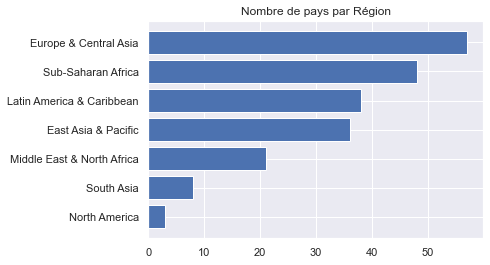

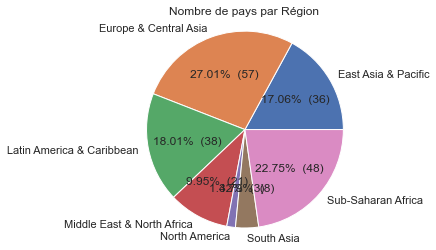

In [173]:
plt.title('Nombre de pays par Région')
#### PIE CHART 
plt.barh(y = df.groupby('Region')[['Country Name']].count().reset_index().sort_values(by='Country Name')['Region'], 
         width = df.groupby('Region')[['Country Name']].count()['Country Name'].sort_values())
plt.show()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

repartition = df.groupby('Region')[['Country Name']].count()
fig1, ax1 = plt.subplots()
ax1.pie(x=repartition["Country Name"], labels=repartition.index, autopct = make_autopct(repartition["Country Name"]))
#autopct='%1.f%%'
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Nombre de pays par Région')

plt.show()

In [172]:
df.groupby('Income Group')[['Country Name']].count()

,Country Name
Income Group,
High income: OECD,31
High income: nonOECD,41
Low income,34
Lower middle income,50
Upper middle income,55


In [43]:
plt.title('Nombre de pays en fonction de la tranche de PIB')
#### PIE CHART 
plt.barh(y = df.groupby('Income Group')[['Country Name']].count().reset_index().sort_values(by='Country Name')['Income Group'], 
         width = df.groupby('Income Group')[['Country Name']].count()['Country Name'].sort_values())
plt.show()



,Country Name
Income Group,
High income: OECD,31
High income: nonOECD,41
Low income,34
Lower middle income,50
Upper middle income,55


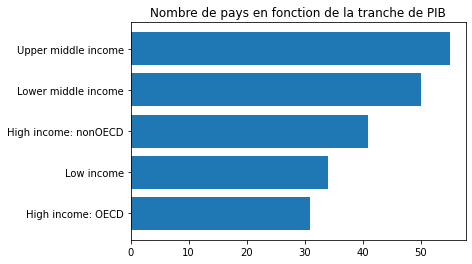

In [45]:
df.groupby(['Income Group', 'Region'])[['Country Name']].count()

Country Name
Income Group         Region                                  
High income: OECD    East Asia & Pacific                    4
                     Europe & Central Asia                 23
                     Latin America & Caribbean              1
                     Middle East & North Africa             1
                     North America                          2
High income: nonOECD East Asia & Pacific                    8
                     Europe & Central Asia                 13
                     Latin America & Caribbean             11
                     Middle East & North Africa             7
                     North America                          1
                     Sub-Saharan Africa                     1
Low income           East Asia & Pacific                    3
                     Europe & Central Asia                  1
                     Latin America & Caribbean              1
                     South Asia                             3
                     Sub-Saharan Africa                    26
Lower middle income  East Asia & Pacific                   12
                     Europe & Central Asia                  7
                     Latin America & Caribbean              7
                     Middle East & North Africa             6
                     South Asia                             4
                     Sub-Saharan Africa                    14
Upper middle income  East Asia & Pacific                    9
                     Europe & Central Asia                 13
                     Latin America & Caribbean             18
                     Middle East & North Africa             7
                     South Asia                             1
                     Sub-Saharan Africa                     7

In [46]:
data.groupby('Country Name')[['Indicator Code']].count();

In [47]:
data.isnull().sum().sum()
#Il y 52568249 valeurs manquantes au total dans ce tableau. 

45723251

In [48]:
data.isnull().sum();

In [49]:
# Find the percentage of missing values per columns
# Creation of a function that gives the percentage missing
def missing_perc(x):
    print (round((x.isnull().sum() * 100/ len(x)),2).sort_values(ascending=True))


x = missing_perc(data)

Country Name       0.00
Country Code       0.00
Indicator Name     0.00
Indicator Code     0.00
Region             0.47
                  ...  
1974              95.94
1972              95.94
1973              95.96
2016              97.99
2017              99.98
Length: 71, dtype: float64


In [50]:
# Drop all the columns where >85% of the data is missing
colsToKeep = ['Country Name','Country Code', 'Indicator Name', 'Indicator Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']
data = data.loc[:,colsToKeep]

In [51]:
Indicateurs = ['UIS.E.3', 
'UIS.E.4',
'SP.POP.1524.TO.UN',
'IT.NET.USER.P2',
'UIS.PTRHC.3',
'UIS.PTRHC.56',
'NY.GDP.PCAP.CD',
'SE.XPD.TOTL.GD.ZS',
'SE.XPD.TOTL.GD.ZS']



In [52]:
data_countries.groupby('Indicator Name').describe()

NameError: name 'data_countries' is not defined

Analyse des projections (période 2020-2100)